ATIVIDADE ATIVA - Probabilidade e Estatística

In [ ]:
#importando os dados da tabela
import requests
from io import StringIO
import pandas as pd

orig_url='https://drive.google.com/file/d/1UrlwBHa47H5lpAkLtDsfuEWfTMQj491X/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_servidores = pd.read_csv(csv_raw,sep=';',low_memory=False)

In [ ]:
# Qual o espaço amostral compreendido nesta base de dados?
df_servidores.shape

(237125, 25)

In [ ]:
# Quantos servidores estão lotados no corpo de bombeiros?
bombeiros = df_servidores[df_servidores['ÓRGÃO'].str.contains('BOMBEIRO')]
bombeiros.shape

(13148, 25)

In [ ]:
# Qual o órgão público com maior número de funcionários?
omf = df_servidores['ÓRGÃO'].value_counts().idxmax()
mnf = df_servidores['ÓRGÃO'].value_counts().max()
print(f"O órgão público com o maior número de funcionários é '{omf}' com {mnf} funcionários.")

O órgão público com o maior número de funcionários é 'SECRETARIA DE ESTADO DE EDUCACAO                                                ' com 66126 funcionários.


In [ ]:
# Qual a probabilidade de ao escolher uma linha ao acaso, ser de um funcionário que trabalha na secretaria de educação?
sec_edu = df_servidores.loc[df_servidores['ÓRGÃO'].str.contains('SECRETARIA DE ESTADO DE EDUCACAO')]
prob = len(sec_edu) / len(df_servidores) * 100
print(f"A probabilidade de escolher um funcionário da Secretaria de Educação ao acaso é de {prob:.2f}%.")

A probabilidade de escolher um funcionário da Secretaria de Educação ao acaso é de 28.04%.


In [ ]:
# Liste todas as funções contidas na base
funcoes = df_servidores['FUNÇÃO'].unique()
print("Lista de funções:")
for funcao in funcoes:
    print(funcao)

Lista de funções:
nan
                                                            
ASSESSOR                                                    
GERENTE DE PROJETOS ESPECIAIS                               
GERENTE                                                     
Assessor Tecnico                                            
ASSESSOR TECNICO                                            
CHEFE                                                       
ASSESSOR ESPECIAL                                           
Assessor                                                    
SUPERINTENDENTE                                             
CONTROLADOR                                                 
DIRETOR                                                     
COMANDANTE                                                  
CHEFE DE GABINETE                                           
VICE-DIRETOR                                                
ASSESSOR SENIOR I                                           
CO

In [ ]:
# Qual órgão publico possui a maior média salarial?
df_servidores['BRUTO'] = df_servidores['BRUTO'].str.replace(',', '.', regex=False).astype(float)
mpo = df_servidores.groupby('ÓRGÃO')['BRUTO'].mean()
oms = mpo.idxmax()
mms = mpo.max()
print(f"O órgão público com a maior média salarial é '{oms}' com uma média de {mms:.2f}.")

O órgão público com a maior média salarial é 'EMPRESA DE ASSISTENCIA TECNICA E EXTENSAO RURAL - EMATER                        ' com uma média de 24592.50.


In [ ]:
# O servidor com maior remuneração básica pertence a qual órgão?
df_servidores['REMUNERAÇÃO BÁSICA'] = df_servidores['REMUNERAÇÃO BÁSICA'].str.replace(',', '.', regex=False).astype(float)
smr = df_servidores.loc[df_servidores['REMUNERAÇÃO BÁSICA'].idxmax()]
omr = smr['ÓRGÃO']
print(f"O servidor com a maior remuneração básica pertence ao órgão '{omr}'.")

O servidor com a maior remuneração básica pertence ao órgão 'CAESB - COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO FEDERAL'.


In [ ]:
#Qual o valor pago para todos os funcionários públicos? Pontuação (1 Ponto)

# df_servidores['BRUTO'] = df_servidores['BRUTO'].str.replace(',', '.', regex=False).astype(float)
# linha acima comentada pois a coluna já foi tratada, caso contrário, basta remover a "#" para que seja tratada novamente.

#df_servidores['LÍQUIDO'] = df_servidores['LÍQUIDO'].str.replace(',', '.', regex=False).astype(float)
total_pago_bruto = df_servidores['BRUTO'].sum()
total_pago_liquido = df_servidores['LÍQUIDO'].sum()
print(f"O valor total pago a todos os funcionários públicos (considerando o valor BRUTO) é R$ {total_pago_bruto:.2f}.")
print(f"O valor total pago a todos os funcionários públicos (considerando o valor LÍQUIDO) é R$ {total_pago_liquido:.2f}.")

O valor total pago a todos os funcionários públicos (considerando o valor BRUTO) é R$ 2597694350.64.
O valor total pago a todos os funcionários públicos (considerando o valor LÍQUIDO) é R$ 2031327201.80.


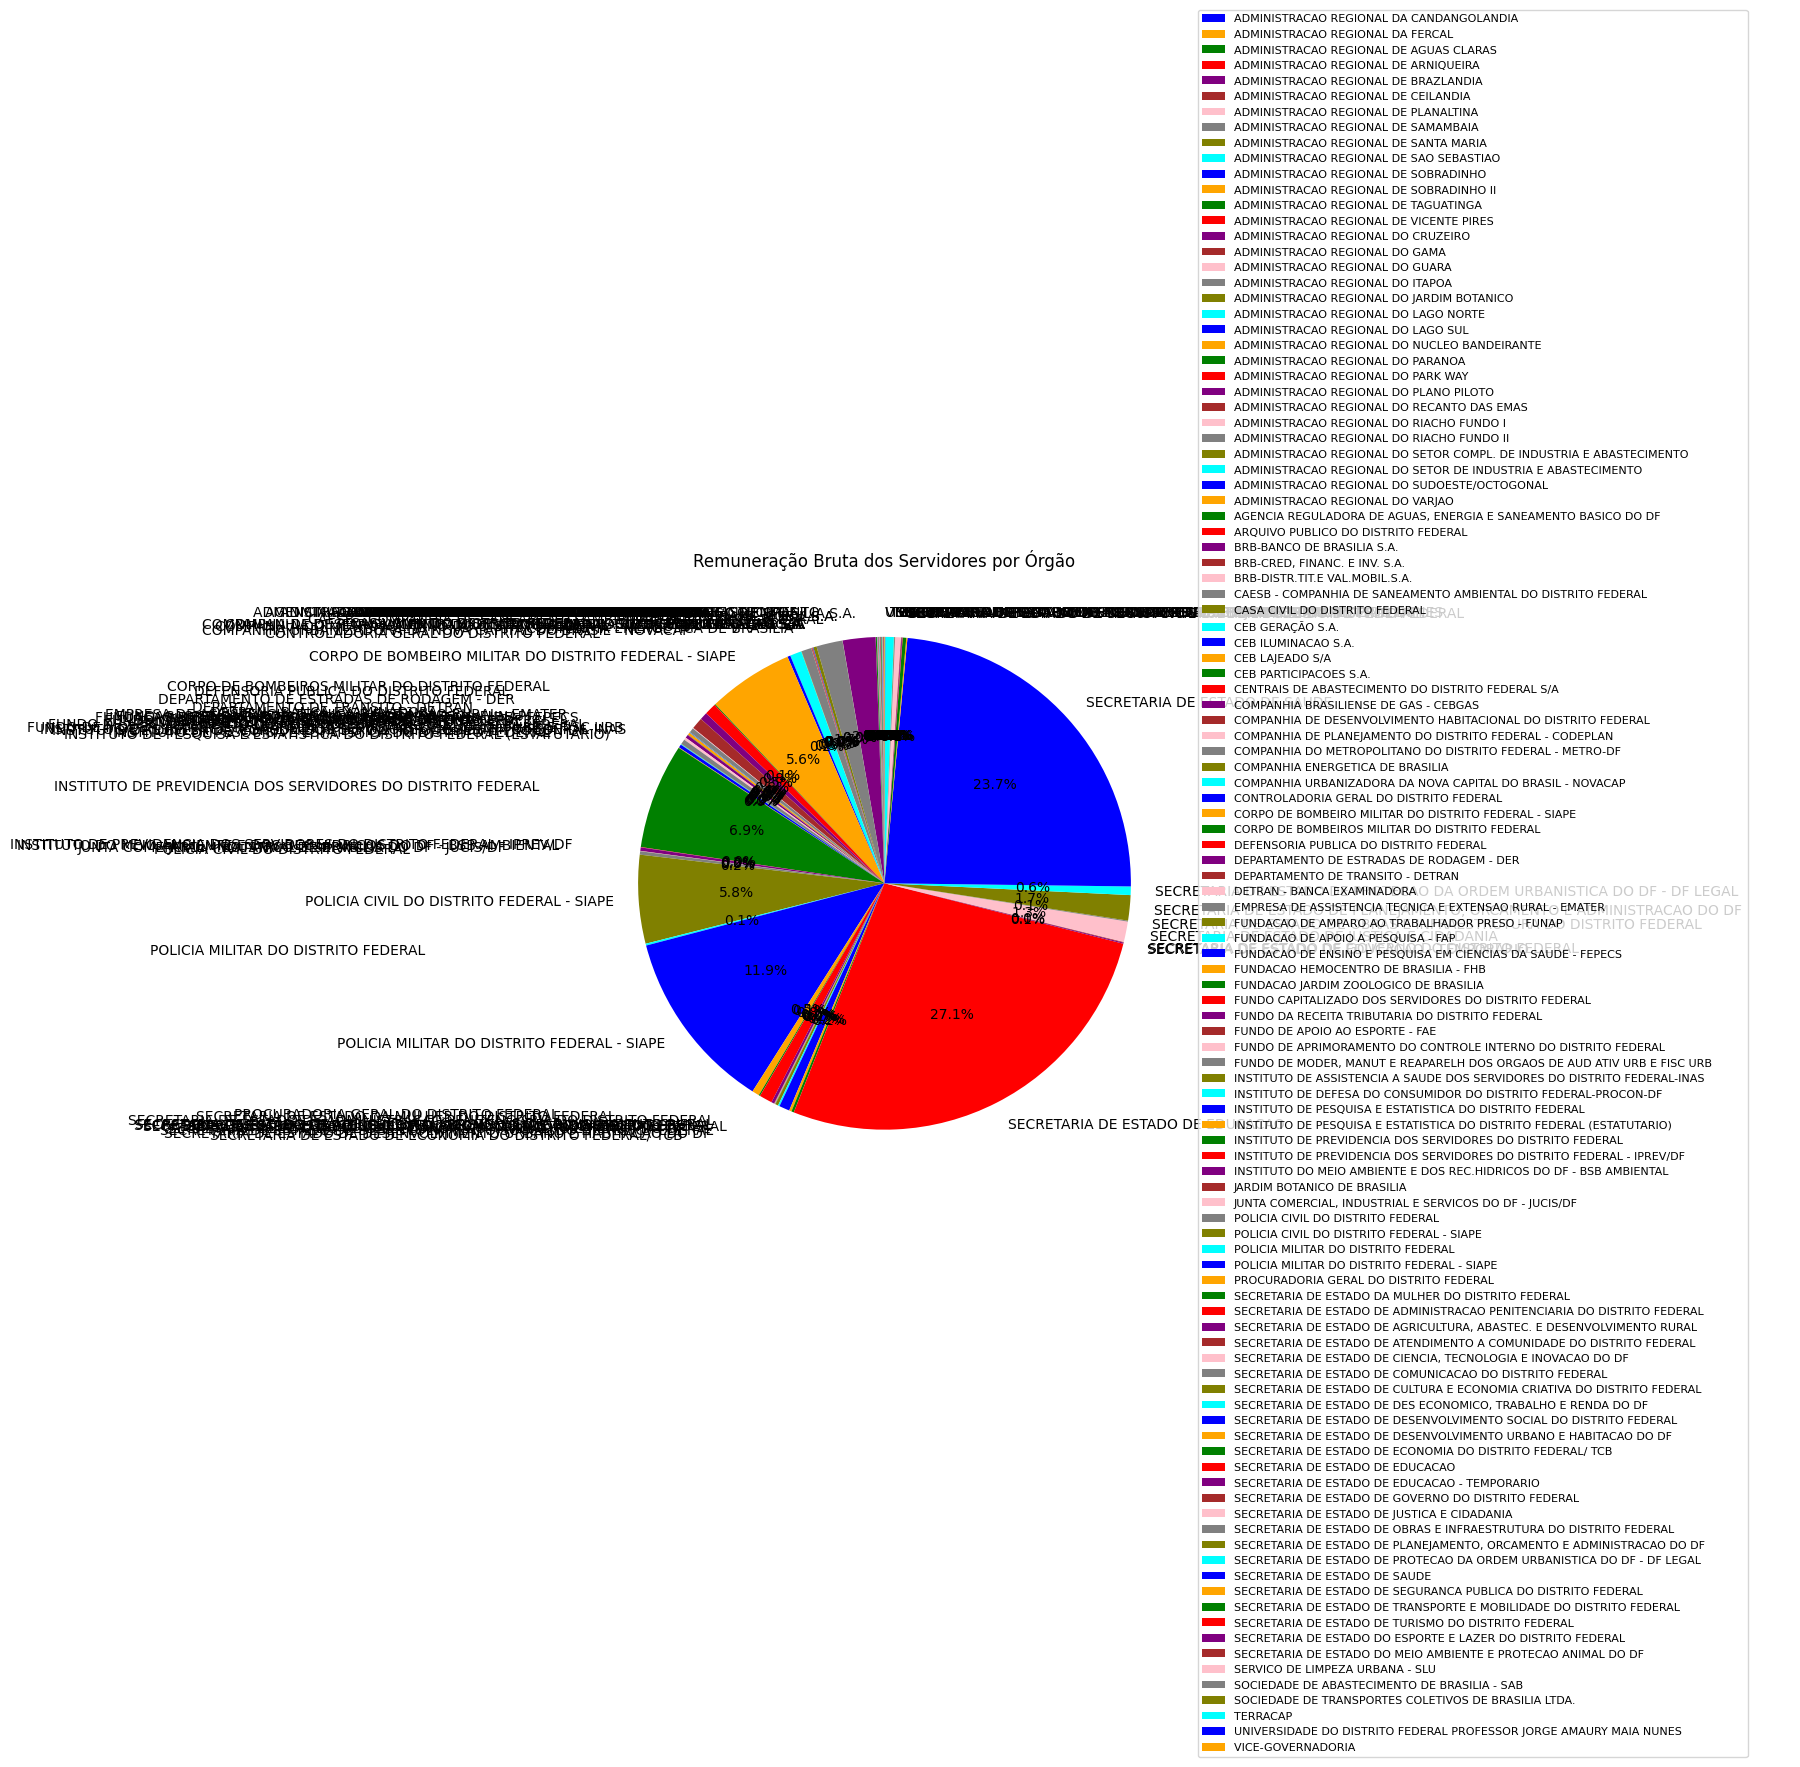

In [ ]:
import matplotlib.pyplot as plt

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# df_servidores['BRUTO'] = df_servidores['BRUTO'].str.replace(',', '.', regex=False).astype(float)
# linha acima comentada pois a coluna já foi tratada, caso contrário, basta remover a "#" para que seja tratada novamente.
rpo = df_servidores.groupby('ÓRGÃO')['BRUTO'].sum()
plt.figure(figsize=(10, 8))
pie_chart = rpo.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colors=colors)
plt.title('Remuneração Bruta dos Servidores por Órgão')
plt.ylabel('')

plt.legend(labels=rpo.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.show()

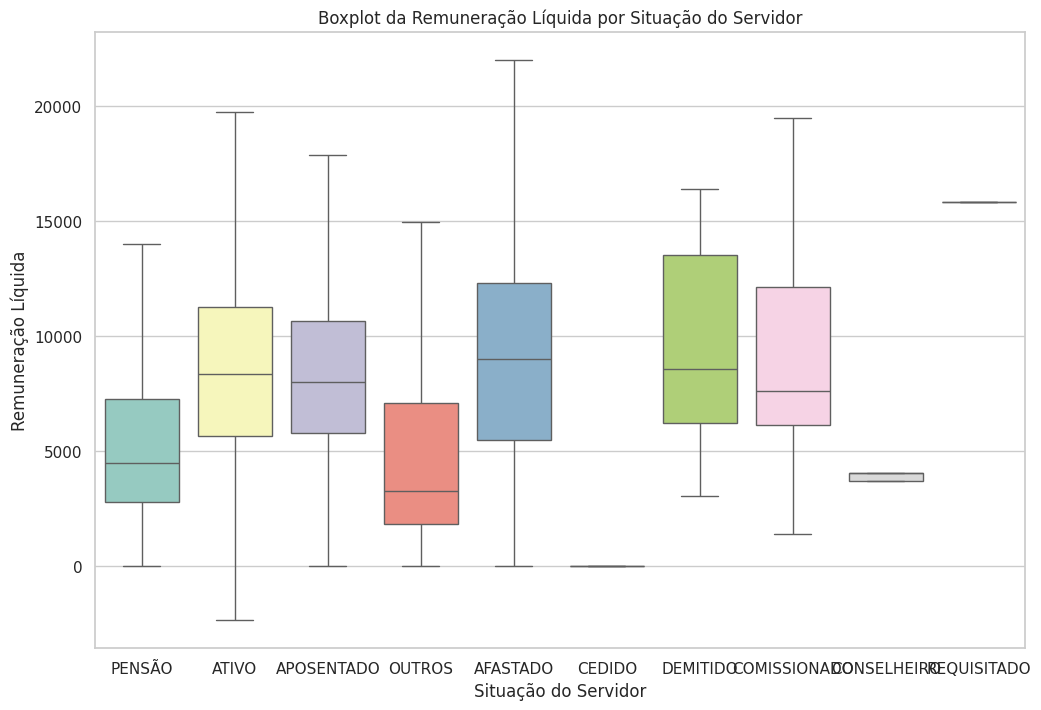

In [ ]:
# Elabore um gráfico de boxplot com a situação do servidor e sua remuneração liquida
import matplotlib.pyplot as plt
import seaborn as sns
def consolidar_situacao(situacao):
    if isinstance(situacao, str):
        if 'ATIVO' in situacao:
            return 'ATIVO'
        elif 'APOSENTADO' in situacao:
            return 'APOSENTADO'
        elif 'PENSAO' in situacao or 'PENSÃO' in situacao:
            return 'PENSÃO'
        elif 'TRABALHANDO' in situacao:
            return 'ATIVO'
        elif 'ATIVO PERMANENTE' in situacao:
            return 'ATIVO'
        elif 'PENSIONISTA' in situacao:
            return 'PENSÃO'
        elif 'AFASTADO' in situacao:
            return 'AFASTADO'
        elif 'COMISSIONADO' in situacao:
            return 'COMISSIONADO'
        elif 'CEDIDO' in situacao:
            return 'CEDIDO'
        elif 'REQUISITADO' in situacao:
            return 'REQUISITADO'
        elif 'CONSELHEIRO' in situacao:
            return 'CONSELHEIRO'
        elif 'DEMITIDO' in situacao:
            return 'DEMITIDO'
        elif 'INATIVO' in situacao:
            return 'INATIVO'
        else:
            return 'OUTROS'
    else:
        return 'OUTROS'

df_servidores['SITUAÇÃO'] = df_servidores['SITUAÇÃO'].apply(consolidar_situacao)
#df_servidores['LÍQUIDO'] = df_servidores['LÍQUIDO'].str.replace(',', '.', regex=False).astype(float)
# linha acima comentada pois a coluna já foi tratada, caso contrário, basta remover a "#" para que seja tratada novamente.
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='SITUAÇÃO', y='LÍQUIDO', hue='SITUAÇÃO', data=df_servidores, showfliers=False, palette='Set3', legend=False)
plt.title('Boxplot da Remuneração Líquida por Situação do Servidor')
plt.xlabel('Situação do Servidor')
plt.ylabel('Remuneração Líquida')
plt.show()

In [ ]:
# Identifique qual órgão possui salário liquido com menos variações, utilizando para isto medidas de dispersão.
# df_servidores['LÍQUIDO'] = df_servidores['LÍQUIDO'].str.replace(',', '.', regex=False).astype(float)
# linha acima comentada pois a coluna já foi tratada, caso contrário, basta remover a "#" para que seja tratada novamente.
epo = df_servidores.groupby('ÓRGÃO')['LÍQUIDO'].agg(['mean', 'std'])
omv = epo['std'].idxmin()
print(f"O órgão com o menor desvio padrão no salário líquido é '{omv}' "
      f"com uma média de {epo.loc[omv, 'mean']:.2f} "
      f"e um desvio padrão de {epo.loc[omv, 'std']:.2f}.")

O órgão com o menor desvio padrão no salário líquido é 'FUNDO DE APOIO AO ESPORTE - FAE                                                 ' com uma média de 1995.58 e um desvio padrão de 137.73.


In [ ]:
# Calcule o índice de correlação entre o IRRF e os salários liquido e bruto. Em qual dos casos o índice de correlação foi maior?

# df_servidores['LÍQUIDO'] = df_servidores['LÍQUIDO'].str.replace(',', '.', regex=False).astype(float)
# df_servidores['BRUTO'] = df_servidores['BRUTO'].str.replace(',', '.', regex=False).astype(float)
# linhas acima comentads pois as colunas já foram tratads, caso contrário, basta remover a "#" para que sejam tratadas novamente.

df_servidores['IRRF'] = df_servidores['IRRF'].str.replace(',', '.', regex=False).astype(float)
corr_irrf_liq = df_servidores['IRRF'].corr(df_servidores['LÍQUIDO'])
c_irrf_b = df_servidores['IRRF'].corr(df_servidores['BRUTO'])
print(f"O índice de correlação entre IRRF e LÍQUIDO é: {corr_irrf_liq:.2f}")
print(f"O índice de correlação entre IRRF e BRUTO é: {c_irrf_b:.2f}")
if abs(corr_irrf_liq) > abs(c_irrf_b):
    print("A correlação entre IRRF e LÍQUIDO é maior.")
elif abs(c_irrf_b) > abs(corr_irrf_liq):
    print("A correlação entre IRRF e BRUTO é maior.")
else:
    print("As correlações são iguais.")

O índice de correlação entre IRRF e LÍQUIDO é: 0.74
O índice de correlação entre IRRF e BRUTO é: 0.85
A correlação entre IRRF e BRUTO é maior.


In [ ]:
# Adicione uma nova coluna que irá conter a diferença entre o salario bruto e liquido

# Tratandos dados das colunas:
#df_servidores['LÍQUIDO'] = df_servidores['LÍQUIDO'].str.replace(',', '.', regex=False).astype(float)
#df_servidores['BRUTO'] = df_servidores['BRUTO'].str.replace(',', '.', regex=False).astype(float)
#df_servidores['IRRF'] = df_servidores['IRRF'].str.replace(',', '.', regex=False).astype(float)
# linhas acima comentads pois as colunas já foram tratads, caso contrário, basta remover a "#" para que sejam tratadas novamente.

# Criando a coluna DIFERENCA:
df_servidores['DIFERENCA'] = df_servidores['BRUTO'] - df_servidores['LÍQUIDO']

# Qual a correlação entre o IRRF pago e esta nova coluna?
cor_irrf_dif = df_servidores['IRRF'].corr(df_servidores['DIFERENCA'])

# Qual órgão apresenta índice de correlação entre IRRF e diferença salarial maior?
corr_o = df_servidores.groupby('ÓRGÃO').apply(lambda x: x['IRRF'].corr(x['DIFERENCA'])).reset_index()
o_m_corr = corr_o.loc[corr_o.groupby('ÓRGÃO')[0].idxmax()]['ÓRGÃO'].values[0]
print(f"A correlação entre IRRF e DIFERENCA é: {cor_irrf_dif:.2f}")
print(f"O órgão com o maior índice de correlação entre IRRF e DIFERENCA é '{o_m_corr}'.")

A correlação entre IRRF e DIFERENCA é: 0.94
O órgão com o maior índice de correlação entre IRRF e DIFERENCA é 'ADMINISTRACAO REGIONAL DA CANDANGOLANDIA                                        '.
